<a href="https://colab.research.google.com/github/daJarae/ML_DL/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%94%A5%EB%9F%AC%EB%8B%9D_3%EC%9E%A5_MNIST%EC%86%90%EA%B8%80%EC%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST

기계학습 분야에서 유명한 데이터셋 (실험용 데이터)

0~9 숫자 이미지로 구성 (훈련 60,000장, 시험 10,000장)

교재 코드가 오류나서 keras.datasets에서 import

In [4]:
import matplotlib.pyplot as plt

In [5]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y)= mnist.load_data()

In [6]:
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape) #1차원

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [7]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
train_X[0][0] #첫번째 사진(1*28*28)의 맨 윗행

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

#배열을 이미지로

PIL 모듈

In [9]:
from PIL import Image
import numpy as np

#된다는데.. 코랩이라 안되나

def img(arr):
  pil_img=Image.fromarray(np.uint8(arr)) #pil_img 객체로
  pil_img.show()

In [10]:
train_X[0].shape

(28, 28)

plt 모듈

In [11]:
import random

indices = random.sample(range(60000),9) #랜덤으로 9개 인덱스

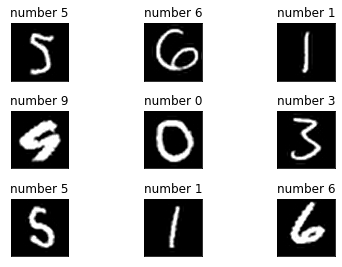

In [12]:
fig = plt.figure()

for i, ind in enumerate(indices): #i:0~8, ind
  plt.subplot(3,3,i+1) #3x3 그림판에서 1~9번째
  plt.tight_layout()   #위치가 subplot 다음이어야 하나봄 (밑으로 옮기니 8번째 그림이 삭제됨) 
  plt.imshow(train_X[ind], cmap='gray', interpolation='sinc') #interpolation='none'일 때 도트간 경계가 뚜렷함
  plt.title("number {}".format(train_y[ind]))
  plt.xticks([]);  plt.yticks([])  #이거 넣어야 x,y축 없이 깔끔

#신경망 구성하기

입력층 뉴런은 28*28개, 출력층 뉴런은 10개

은닉층(입력/출력 사이)은 두 개로 첫층에 뉴런 50개, 두번째 층에 100개

In [13]:
import numpy as np

#활성화함수

def sigmoid(x):
  return 1/(1+np.exp(-x))

def softmax(x):
  return np.max(0,x)


#데이터 불러오기

def get_data():
  from keras.datasets import mnist
  (train_x, train_y), (test_x, test_y)= mnist.load_data()
  return train_x, test_x, train_y, test_y


# 파라미터 딕셔너리를 이용해 예측하기

def predict(network,x):

  w1,w2,w3=network['w1'],network['w2'],network['w3'] #w1:784*50, w2:50*100, w3:100*10
  b1,b2,b3=network['b1'],network['b2'],network['b3'] #b1:784, b2:50, b3:100,

  h1=np.dot(x,w1)+b1
  out1=sigmoid(h1)
  h2=np.dot(x,w2)+b2
  out2=sigmoid(h2)
  h3=np.dot(x,w3)+b3
  
  return softmax(h3)

#이건 언제 어떻게 쓰려는거지? (미이용 코드)
#def init_network():
#  with open("sample_weight.pkl",'rb') as f:
#    network=pickle.load(f)

이미지를 1장씩 처리하는 것보다 여러장 묶어서 계산하는 배치 처리가 효율적임

수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리하도록 최적화되어 있음 (numpy기반이 C의 정적 자료형~이어서 속도가 빠르다는..) 

또한 이미지 한장씩 불러와 처리할 때는 병목 현상이 발생하나 (큰 계산 한번보다 작은 계산 여러번이 느림)

데이터를 읽는 작업보다 CPU나 GPU로 순수 계산 수행하는 작업 비율이 상대적으로 늘어서 버스에 주는 부하 감소

#softmax 통과 후 레이블 예측

In [14]:
result=[[0.5,0.4,0.1],
        [0.4,0.3,0.3]]  #두 데이터의 세 클래스 중 예측

print(np.argmax(result, 1)) #행마다 최댓값의 idx (열 형태 보존) - 일반적으로 사용하게 됨★
print(np.argmax(result, 0)) #열마다 최댓값의 idx (행 형태 보존)

[0 0]
[0 0 1]


#정답률 계산

In [15]:
real=np.array([0,1]) #test_y에 해당
answer=np.argmax(result,1) #predict에 argmax 적용

print("정답률: {}%".format(int((np.sum(answer==real)/len(real)*100))))

정답률: 50%




---



#그래서 손글씨 인식은??

교재에서 신경망 구조만 설명하고 실제 예측은 안시킨 연유로...

In [16]:
def get_data():
  from keras.datasets import mnist
  (train_x, train_y), (test_x, test_y)= mnist.load_data()
  return train_x[:10000], test_x[:1000], train_y[:10000], test_y[:1000]

#6만/1만개 다 쓰지 않고 1만/천개만 써야지

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#인스턴스
model = Sequential()

#입력층~은닉층1
model.add(Dense(50, input_dim=784, activation='sigmoid'))

#은닉층~은닉층2
model.add(Dense(100, activation='sigmoid'))

#은닉층2~출력층
model.add(Dense(10, activation='softmax')) #마지막은 softmax

#컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

적합

In [18]:
X,x,Y,y=get_data()

그런데 바로 모델 학습을 시킬 수는 없다... 28*28 데이터를 flatten 해줘야 한다

In [19]:
X.shape

(10000, 28, 28)

In [20]:
flat_X=[]; flat_x=[]

for X in X:
  flat_X.append(X.flatten())
for x in x:
  flat_x.append(x.flatten())

In [21]:
X_=np.array(flat_X)
x_=np.array(flat_x)
print(X_.shape, x_.shape) #성공적으로 faltten 되었다

(10000, 784) (1000, 784)


아차차.. y레이블에 원핫인코딩을 해줘야 소프트맥스를 사용할 수 있다!

In [22]:
Y_=Y.reshape(len(Y),1)
y_=y.reshape(len(y),1)

In [23]:
print(Y.shape,Y_.shape) #1차원 배열을 2차원 배열로
print(Y[:3])
print(Y_[:3]) #10000개의 행이 있는 하나의 열

(10000,) (10000, 1)
[5 0 4]
[[5]
 [0]
 [4]]


In [24]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False) #sparse=False 안하면 이상해짐
Y_ = onehot.fit_transform(Y_)
y_ = onehot.fit_transform(y_)

잘 인코딩 되었다

In [25]:
print(Y_[0], Y[0])
print(y_[0], y[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7




---



#드디어 학습

참고로 100에포크 동안 100배치로 10000개의 데이터를 볼것이므로

가중치 업데이트는 100*100해서 만번 발생할 것

In [ ]:
history=model.fit(X_, Y_, epochs=100, batch_size=100, validation_data=(x_, y_))

#예측

In [27]:
pred=np.argmax(model.predict(x_), 1) #원핫으로 넣어도 argmax로 최고 소수의 자릿값을 반환하므로 정수 레이블 받음
pred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [28]:
tf=(pred==y) #원핫 인코딩 되지 않은 y와 비교해야함!

정확성은?

In [29]:
print("정확성: {}".format(np.sum(tf)/len(tf)))

정확성: 0.901


틀린 문제를 추적해볼까요?

In [33]:
wrong=x_[pred!=y]
wrong_pred=pred[pred!=y]

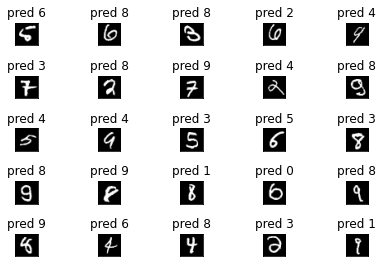

In [34]:
#인덱스 수정 (25개)
sub=wrong[:25]
ans=wrong_pred[:25]

fig = plt.figure() #이거 없으면 오류다... ㄷㄷ 

for idx, num in enumerate(sub):
  plt.subplot(5,5,idx+1)
  plt.tight_layout()
  plt.imshow(num.reshape(28,28), cmap='gray')
  plt.title("pred {}".format(ans[idx]))
  plt.xticks([]); plt.yticks([])

어라.. 쉬워보이는 것도 많이 틀렸네요

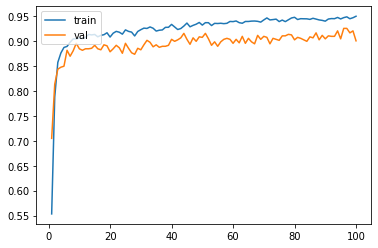

In [32]:
epochs=range(1,len(history.history['acc'])+1)

plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])

plt.legend(['train','val'], loc='upper left')
plt.show()

정확성 비교를 보니 꾸준한 상승세에 올라있던 것을 보아, 가중치 업데이트를 더 여러번 해도 좋았을 것 같습니다.

다음 세가지 실험을 해보죠

1) 다른 상황은 그대로, 배치를 반으로 줄인다

2) 다른 상황은 그대로, 에포크를 두배로 늘린다

3) 다른 상황은 그대로, 훈련 데이터를 두배로 늘린다

아마 3이 압도적인 성능 개선을 보이겠죠?



---



#성능 개선해보기

#1. 배치를 반으로

여기서는 X,x,Y,y에 변화가 없습니다

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#인스턴스
model1 = Sequential()

#입력층~은닉층1
model1.add(Dense(50, input_dim=784, activation='sigmoid'))

#은닉층~은닉층2
model1.add(Dense(100, activation='sigmoid'))

#은닉층2~출력층
model1.add(Dense(10, activation='softmax')) #마지막은 softmax

#컴파일
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history=model1.fit(X_, Y_, epochs=100, batch_size=50, validation_data=(x_, y_))

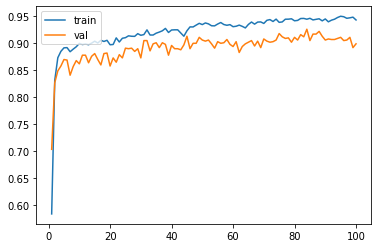

In [36]:
epochs=range(1,len(history.history['acc'])+1)

plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])

plt.legend(['train','val'], loc='upper left')
plt.show()

train의 정확성은 안정적인 성장세를 보이나 검증 정확성이 불안정합니다.

한정된 데이터로 업데이트 수만 늘린 결과 과적합에 가까워졌을 수 있겠습니다.

#2. 에포크를 두배로

여기서도 x,y에는 변화가 없습니다

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#인스턴스
model2 = Sequential()

#입력층~은닉층1
model2.add(Dense(50, input_dim=784, activation='sigmoid'))

#은닉층~은닉층2
model2.add(Dense(100, activation='sigmoid'))

#은닉층2~출력층
model2.add(Dense(10, activation='softmax')) #마지막은 softmax

#컴파일
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history2=model2.fit(X_, Y_, epochs=200, batch_size=50, validation_data=(x_, y_))

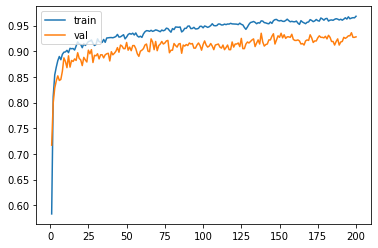

In [44]:
epochs=range(1,len(history2.history['acc'])+1)

plt.plot(epochs, history2.history['acc'])
plt.plot(epochs, history2.history['val_acc'])

plt.legend(['train','val'], loc='upper left')
plt.show()

최종 검증 정확성 0.928로, 배치 사이즈만 반으로 한 0.898의 경우보다 정확합니다

둘다 각각 에포크x한에포크 계산수가 100x200과 200x100으로 연산횟수는 동일하기 때문에

 과소적합이 의심될 때는 에포크를 늘리는 게 이득이군요.

#3. 데이터 크기 두배

테스트 데이터는 그대로 사용하고, 훈련 데이터만 바꾸겠습니다.

In [50]:
(train_x, train_y), (test_x, test_y)= mnist.load_data()

X__=train_x[:20000]
Y=train_y[:20000]

In [51]:
X__.shape

(20000, 28, 28)

In [52]:
flat_X_=[]

for X in X__:
  flat_X_.append(X.flatten())

X__=np.array(flat_X_)
Y__=Y.reshape(len(Y),1)

In [55]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False)
Y__= onehot.fit_transform(Y__)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model3=Sequential()

model3.add(Dense(50, input_dim=784, activation='sigmoid'))
model3.add(Dense(100, activation='sigmoid'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history3=model3.fit(X__,Y__, epochs=100, batch_size=100, validation_data=(x_,y_))

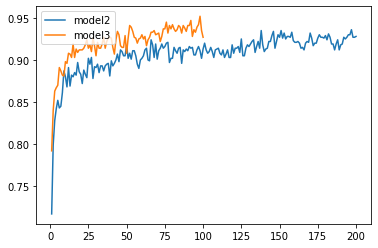

In [59]:
epoch2=range(1,len(history2.history['acc'])+1)
epoch3=range(1,len(history3.history['acc'])+1)

plt.plot(epoch2, history2.history['val_acc'])
plt.plot(epoch3, history3.history['val_acc'])

plt.legend(['model2','model3'], loc='upper left')
plt.show()

model3이 데이터 크기가 두배임에도 마지막 학습에서 검증 점수가 크게 떨어져 model2와 점수가 비슷해졌네요!? 이럴수가~

역시 최고의 조합은 크기 두배 * 에포크 두배겠죠?

# 4. 크기 두배, 에포크 두배

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model4=Sequential()

model4.add(Dense(50, input_dim=784, activation='sigmoid'))
model4.add(Dense(100, activation='sigmoid'))
model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history3=model3.fit(X__,Y__, epochs=200, batch_size=100, validation_data=(x_,y_))

Epoch 1/200
200/200 [==============================] - 1s 7ms/step - loss: 0.1455 - acc: 0.9557 - val_loss: 0.2215 - val_acc: 0.9290
Epoch 2/200
200/200 [==============================] - 1s 7ms/step - loss: 0.1487 - acc: 0.9531 - val_loss: 0.1967 - val_acc: 0.9410
Epoch 3/200
200/200 [==============================] - 1s 7ms/step - loss: 0.1403 - acc: 0.9543 - val_loss: 0.2030 - val_acc: 0.9380
Epoch 4/200
200/200 [==============================] - 1s 7ms/step - loss: 0.1317 - acc: 0.9584 - val_loss: 0.2028 - val_acc: 0.9340
Epoch 5/200
200/200 [==============================] - 1s 6ms/step - loss: 0.1332 - acc: 0.9573 - val_loss: 0.1971 - val_acc: 0.9380
Epoch 6/200
200/200 [==============================] - 1s 4ms/step - loss: 0.1354 - acc: 0.9575 - val_loss: 0.1979 - val_acc: 0.9390
Epoch 7/200
200/200 [==============================] - 1s 4ms/step - loss: 0.1370 - acc: 0.9578 - val_loss: 0.2012 - val_acc: 0.9360
Epoch 8/200
200/200 [==============================] - 1s 5ms/step - 

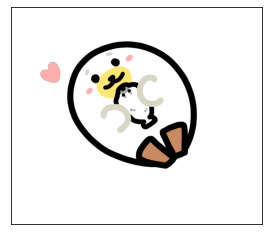

오늘은 여기까지!


In [64]:
from matplotlib.image import imread
img=imread('cute.png')
plt.imshow(img)
plt.xticks([]); plt.yticks([])
plt.show()

print("오늘은 여기까지!")

이미지 불러오는 코드가 생각보다 긴데 모듈로 만들어서 쓰려면 주피터 노트북이 편하려나...